### Import Libraries

In [1]:
#Import Libraries
import numpy as np #Basic operations
import pandas as pd #For dataframe manipulations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns
import plotly.express as px #For plotting graphs
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error

### Read the data

In [2]:
df= pd.read_csv('D:/KDU BLENDER LEARNING/Introduction to Data Science/New datasetr/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4250827.csv')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN,NaN


### Looking at the columns

In [3]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

- As there are some column categories that do not have any relation with what we are doing, we are going to drop Country Code, Indicator Name, Indicator Code

### Dropping Unnecesary columns in the dataset

In [4]:
drop_cols = ["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 66"]
df.drop(drop_cols, axis=1, inplace=True)

In [5]:
df.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

### Looking at the values in the dataset

In [6]:
#Setting the graphs
plt.rcParams.update({'font.size': 10})
sns.set_style("darkgrid")

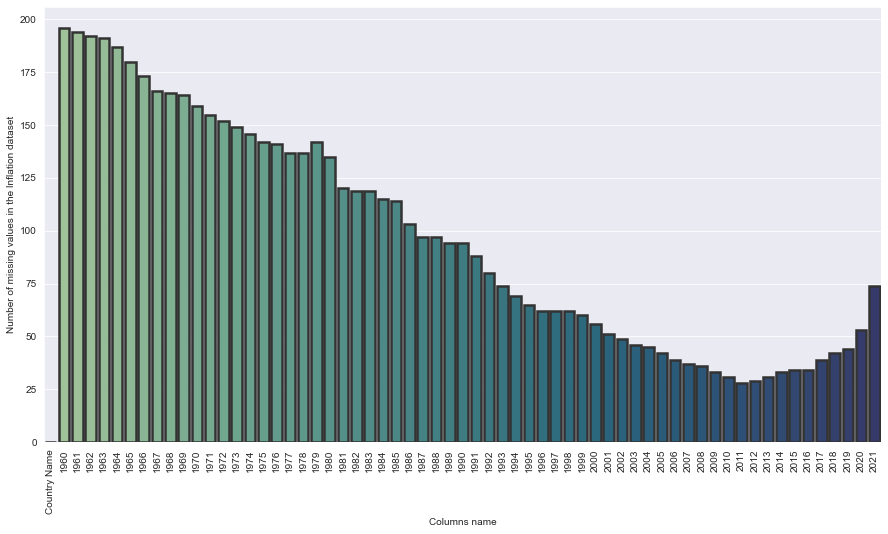

In [7]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.barplot(x=df.columns, y=df.isna().sum(),linewidth=2.5, edgecolor=".2",palette='crest')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in the Inflation dataset")
plt.show()

- Some of the countries have missing values in the dataset, most countries have missing data as early as 1960, we will need to clean the dataset first in order to have an accurate representation.

#### How many countries have missing values?Which ones?

In [8]:
print("The amount of countries that have null values are: ",df.isnull().any(axis = 1).sum())

The amount of countries that have null values are:  202


- There are a total of 202 countries that have missing data since 1960, we are going to isolate those countries and create a new dataset with them.

In [9]:
df[df.isna().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,NaN,NaN,2.654867,0.689655,5.308219,2.113821,2.866242,-0.515996,1.711618,...,2.049019,0.610086,-0.406816,0.724470,1.304719,1.749897,4.197459,0.982327,-1.568912,3.133205
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.885387,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.575900,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.732585,22.021234


### Dropping the columns with Null values

In [10]:
da = df.dropna(axis = 0) 
da

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
13,Australia,3.728814,2.287582,-0.319489,0.641026,2.866242,3.405573,3.293413,3.478261,2.521008,...,1.762780,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910
14,Austria,1.945749,3.542240,4.381799,2.708767,3.868564,4.930916,2.054821,3.974673,2.764864,...,2.485676,2.000156,1.605812,0.896563,0.891592,2.081269,1.998380,1.530896,1.381911,2.766667
17,Belgium,0.299467,0.992676,1.404607,2.148003,4.168761,4.065201,4.174348,2.730303,2.701450,...,2.839663,1.113096,0.340003,0.561429,1.973853,2.125971,2.053165,1.436820,0.740792,2.440249
19,Burkina Faso,7.788162,18.562139,1.675910,5.574203,1.845123,-0.730253,2.364106,-4.333754,-0.286714,...,3.818152,0.533739,-0.258090,0.724839,0.441041,1.482999,1.955943,-3.233389,1.884701,3.653268
28,Bolivia,11.533153,7.561493,5.879331,-0.706357,10.181818,2.860286,6.951872,11.200000,5.470624,...,4.515603,5.736400,5.766601,4.059610,3.623214,2.822758,2.272060,1.839545,0.940742,0.737384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Latin America & the Caribbean (IDA & IBRD coun...,2.080000,2.430794,2.100840,2.931618,3.324033,2.631579,3.483776,2.136259,3.969454,...,4.144573,3.287144,3.477561,3.143417,2.773160,2.822758,2.298102,2.091639,1.767516,4.266358
244,Turkiye,5.664740,3.172857,3.888320,6.362707,1.119638,4.555534,8.471996,13.974893,6.046240,...,8.891570,7.493090,8.854573,7.670854,7.775134,11.144311,16.332464,15.176822,12.278957,19.596493
250,Uruguay,38.504037,22.747264,10.907424,21.254696,42.369416,56.556557,73.462693,89.275297,125.336991,...,8.097766,8.575135,8.877353,8.666270,9.639413,6.218094,7.606534,7.881989,9.756406,7.747914
251,United States,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,3.015075,2.772786,4.271796,...,2.069337,1.464833,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,1.233584,4.697859


In [11]:
print("The amount of countries that have null values are: ",da.isnull().any(axis = 1).sum())

The amount of countries that have null values are:  0


- We have clean the dataset of all null values, now let's see how many countries have a full data completion.

In [12]:
da.count()

Country Name    64
1960            64
1961            64
1962            64
1963            64
                ..
2017            64
2018            64
2019            64
2020            64
2021            64
Length: 63, dtype: int64

- We have 64 countries with full data starting from 1960

In [13]:
# to expand the maximum output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Transpose the Dataset and Reindex

In [14]:
def da_null(num):
    null=da.loc[[num]].isna().sum().sum()
    name= da.loc[num,'Country Name']
    
    return  name, null

In [15]:
transp= da.T
transp.columns = transp. iloc[0]

transp=transp.drop(index='Country Name')
transp.reset_index(inplace=True)
transp=transp.rename(columns = {'index':'Year'})
transp

Country Name,Year,Australia,Austria,Belgium,Burkina Faso,Bolivia,Canada,Switzerland,Colombia,Costa Rica,Cyprus,Germany,Denmark,Dominican Republic,Ecuador,"Egypt, Arab Rep.",Euro area,Spain,European Union,Finland,France,United Kingdom,Greece,Guatemala,Honduras,Haiti,Indonesia,India,Ireland,Iceland,Israel,Italy,Jamaica,Japan,Kenya,"Korea, Rep.",Latin America & Caribbean (excluding high income),Sri Lanka,Luxembourg,Morocco,Mexico,Malta,Malaysia,North America,Nigeria,Netherlands,Norway,New Zealand,OECD members,Pakistan,Panama,Peru,Philippines,Portugal,Paraguay,Post-demographic dividend,Sudan,El Salvador,Sweden,Thailand,Latin America & the Caribbean (IDA & IBRD countries),Turkiye,Uruguay,United States,South Africa
0,1960,3.728814,1.945749,0.299467,7.788162,11.533153,1.358696,1.438795,5.814076,0.790206,0.827301,1.536612,1.25523,-3.562192,1.676599,0.332829,1.74118,1.177771,1.74118,3.418127,4.139936,1.003576,1.477848,-1.190693,-1.746238,-5.030042,39.590444,1.779878,0.450837,1.988397,2.228112,2.350161,3.274249,3.574512,1.243781,7.965566,2.266871,-1.544677,0.44962,3.424299,4.927519,3.384615,0.063183,1.408336,5.444327,2.323944,0.360492,0.697929,1.945749,6.947368,0.051177,8.664459,4.154822,3.046593,8.181818,1.536612,0.09224,-0.038974,4.141779,-0.765864,2.08,5.66474,38.504037,1.457976,1.288859
1,1961,2.287582,3.54224,0.992676,18.562139,7.561493,1.018767,1.845398,8.28319,2.430794,-0.615385,2.293676,3.451629,-3.9,3.985621,0.693607,1.87085,0.809253,2.077138,1.691002,2.400461,3.447496,2.103579,-0.553335,1.562992,3.779706,13.691932,1.695213,2.756999,4.711615,6.789823,2.050697,6.698451,5.368462,2.457002,8.195653,3.10525,1.134444,0.482434,1.763125,1.60876,2.511322,-0.180408,1.044745,6.279147,1.307639,2.155173,1.797704,2.157973,1.64042,0.613811,5.916709,1.595633,1.548997,18.487395,2.077138,8.760511,-2.68247,2.157973,7.38699,2.430794,3.172857,22.747264,1.070724,2.102374
2,1962,-0.319489,4.381799,1.404607,1.67591,5.879331,1.061571,4.315993,4.697094,2.67786,0.103199,2.84328,7.37782,9.157128,2.870885,-3.003077,2.752672,5.706477,3.553504,4.383983,5.33128,4.196499,-0.475428,2.05255,1.09215,-0.554904,131.397849,3.632215,4.263727,11.016292,9.408194,4.691144,1.407507,6.83544,3.117506,6.618311,2.076695,1.50358,0.895947,5.096729,1.198984,0.168675,0.10844,1.130172,5.265632,2.431123,5.27426,2.680854,4.263727,-0.516462,0.788002,6.641093,5.796652,2.662064,1.41844,3.519889,1.662871,0.096154,4.766197,3.696099,2.10084,3.88832,10.907424,1.198773,1.246285
3,1963,0.641026,2.708767,2.148003,5.574203,-0.706357,1.628151,3.440213,26.355436,2.931618,1.958763,2.966961,6.105033,8.5796,5.939509,0.746646,2.921642,8.743698,2.921642,4.996382,4.999153,2.018544,3.184663,0.151451,3.081456,4.306822,145.910781,2.946161,2.453621,12.928023,6.581137,7.454718,1.762503,6.706906,0.697674,20.691647,2.51476,2.272905,2.876322,5.699712,0.594055,1.876353,3.105254,1.43391,-2.694655,3.243647,2.471611,1.968499,2.966961,1.456488,0.449888,6.070144,5.625549,2.021583,2.097902,2.874031,4.688233,1.569004,2.87174,0.0,2.931618,6.362707,21.254696,1.239669,1.33797
4,1964,2.866242,3.868564,4.168761,1.845123,10.181818,1.912145,3.080557,17.072435,3.324033,-0.303337,2.335728,3.092784,2.107112,4.034205,3.660983,3.656731,6.979247,3.41628,10.275861,3.211192,3.281587,0.617303,-0.193564,4.472101,9.162146,108.994709,13.355261,6.71729,19.245054,5.17275,5.912323,2.013423,3.800389,-0.099305,29.462831,3.679119,3.195647,3.096382,4.021541,2.337903,2.180244,-0.402732,1.595528,0.856793,5.823768,5.867015,3.474905,3.444898,4.179587,2.413536,9.792285,8.183079,3.444898,1.369863,3.334625,3.950838,1.757566,3.387662,-0.792079,3.324033,1.119638,42.369416,1.278912,2.534973
5,1965,3.405573,4.930916,4.065201,-0.730253,2.860286,2.332657,3.414479,7.590684,-0.665,0.20284,3.242329,5.45,-1.89166,3.069071,14.839004,3.666483,13.214138,3.98662,4.940588,2.703105,4.773775,3.220872,-0.8,3.186275,2.263943,306.76311,9.474759,4.988124,7.317069,7.708333,4.519268,2.631579,6.655991,3.578529,13.548195,2.745932,0.222783,3.333679,3.482821,3.568039,1.60221

- Now we have a easier look for  the dataset

In [16]:
columns= transp.columns[1:]
columns

Index(['Australia', 'Austria', 'Belgium', 'Burkina Faso', 'Bolivia', 'Canada', 'Switzerland', 'Colombia', 'Costa Rica', 'Cyprus', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Euro area', 'Spain', 'European Union', 'Finland', 'France', 'United Kingdom', 'Greece', 'Guatemala', 'Honduras', 'Haiti', 'Indonesia', 'India', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'Korea, Rep.', 'Latin America & Caribbean (excluding high income)', 'Sri Lanka', 'Luxembourg', 'Morocco', 'Mexico', 'Malta', 'Malaysia', 'North America', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand', 'OECD members', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Portugal', 'Paraguay', 'Post-demographic dividend', 'Sudan', 'El Salvador', 'Sweden', 'Thailand', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Turkiye', 'Uruguay', 'United States', 'South Africa'], dtype='object', name='Country Name')

### Line plot for Inflation Rate of countries

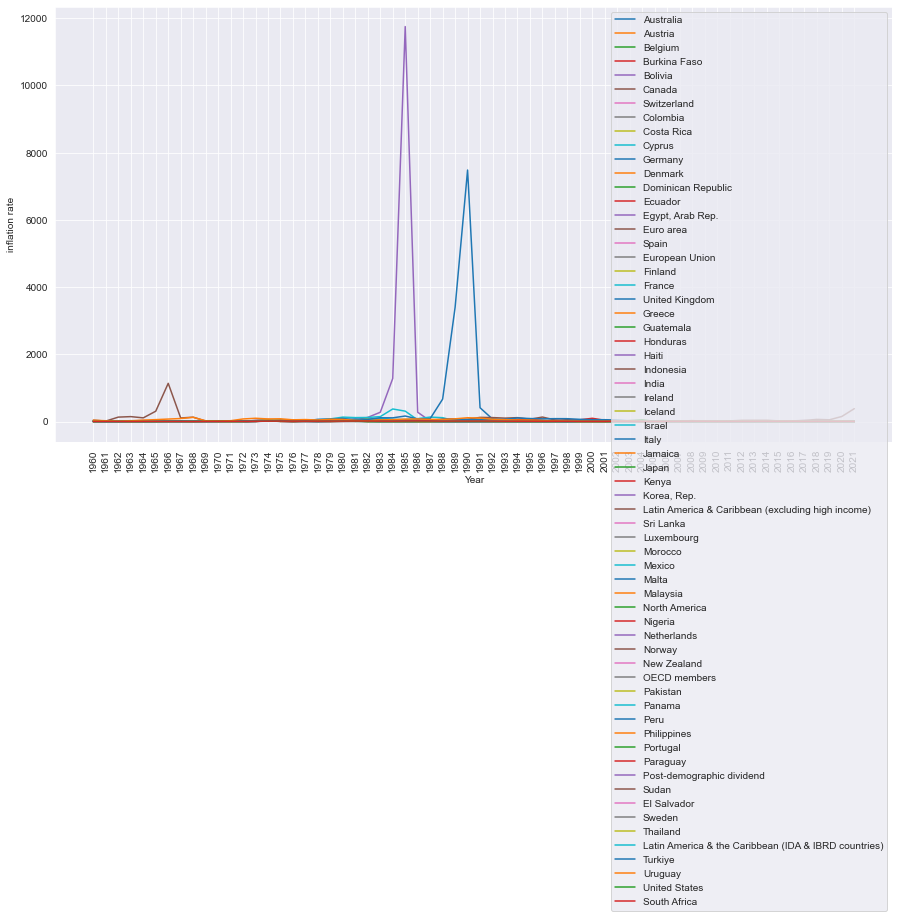

In [17]:
plt.rcParams['figure.figsize']=15,8
plt.ylabel("inflation rate")
plt.xticks(rotation=90)

for country in columns:
    sns.lineplot(data=transp,x='Year',y=country)
    
plt.legend(columns)
    
    
plt.show()

- The lineplot of countries does not give an accurate representation of the countries, therefore we are going to split them up and look at their Inflation rate individually.

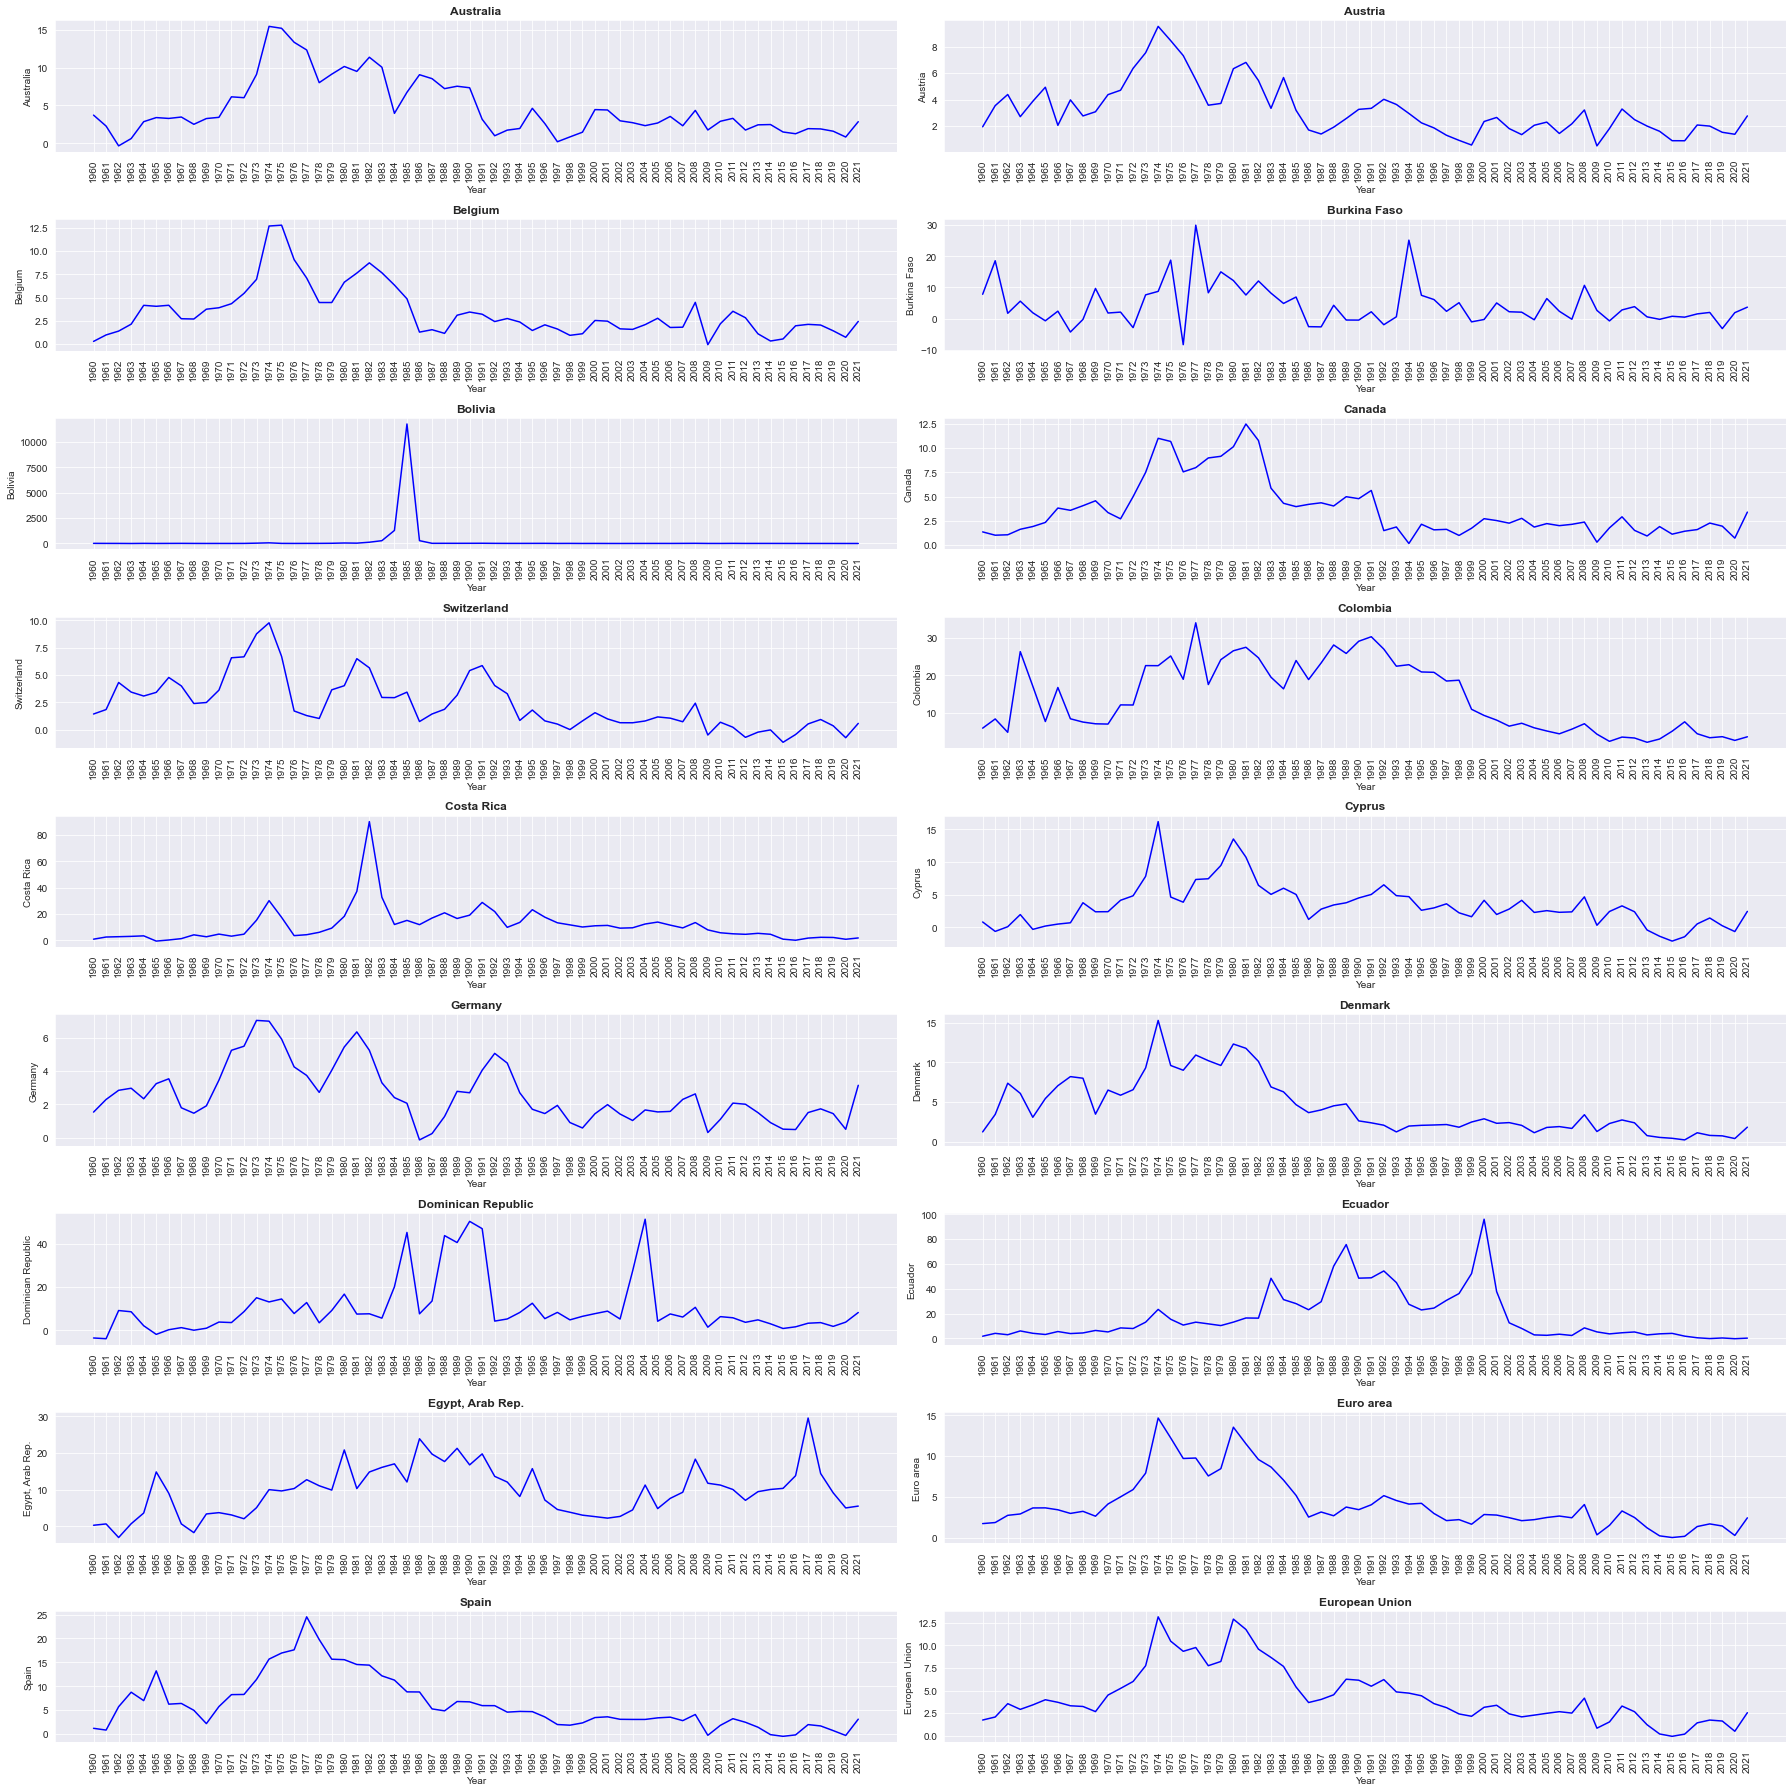

In [18]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(9,2, figsize=(25,25))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,columns):
    
    sns.lineplot(data=transp,x='Year',y=col,color='Blue',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'].tolist(),rotation=90)
    
fig.tight_layout()
fig.show()

This LinePlot tells us that Brazil had got the highest amount of inflation were Bolivia, Costa Rice and Ecuador. Next, We are going to look into the Inflation rate details.

### Countries with the most and least mean inflations rates.

In [19]:
#Creating the new value Rate
da = pd.melt(da, id_vars='Country Name', var_name='Year', value_name='Rate')
print(f'Total number of countries and territories: ', da['Country Name'].nunique())
da.head()

Total number of countries and territories:  64


,Country Name,Year,Rate
0,Australia,1960,3.728814
1,Austria,1960,1.945749
2,Belgium,1960,0.299467
3,Burkina Faso,1960,7.788162
4,Bolivia,1960,11.533153


In [20]:
da['Year'] = da['Year'].astype('int32')
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  3968 non-null   object 
 1   Year          3968 non-null   int32  
 2   Rate          3968 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 77.6+ KB


### The min, max and mean of countries

In [21]:
da.groupby('Country Name')[['Rate']].agg(['min','max','mean'])

Rate                          
                                                          min           max        mean
Country Name                                                                           
Australia                                           -0.319489     15.416667    4.658373
Austria                                              0.506309      9.521788    3.214976
Belgium                                             -0.053146     12.768199    3.397194
Bolivia                                             -0.706357  11749.639632  229.892921
Burkina Faso                                        -8.400719     29.986104    4.221638
Canada                                               0.165563     12.471612    3.691791
Colombia                                             2.018098     34.090909   13.995635
Costa Rica                                          -0.665000     90.121333   11.289356
Cyprus                                              -2.096998     16.176667    3.365805
Denmark                                              0.250000     15.275206    4.389501
Dominican Republic                                  -3.900000     51.460860   10.388978
Ecuador                                             -0.338872     96.094114   17.647360
Egypt, Arab Rep.                                    -3.003077     29.506608    9.618472
El Salvador                                         -2.682470     31.935016    7.081856
Euro area                                            0.037514     14.664845    4.150478
European Union                                      -0.061645     13.163603    4.408444
Finland                                             -0.207929     17.811397    4.504183
France                                               0.037514     13.649317    4.038621
Germany                                             -0.129413      7.032026    2.583170
Greece                                              -1.735888     26.560847    7.853181
Guatemala                                           -1.190693     41.221867    7.735643
Haiti                                              -11.449465     39.331620   10.224613
Honduras                                            -1.746238     33.972260    7.954398
Iceland                                              1.552656     83.950046   15.155019
India                                               -7.633948     28.598734    7.375878
Indonesia                                            1.560130   1136.254112   43.214283
Ireland                                             -4.478103     20.875850    5.213278
Israel                                              -0.634391    373.215675   29.369471
Italy                                               -0.137708     21.064168    5.642230
Jamaica                                              1.407507     77.296593   13.316595
Japan                                               -1.352837     23.222246    2.935286
Kenya                                               -0.171501     45.978881    9.852239
Korea, Rep.                                          0.383000     29.462831    7.688988
Latin America & Caribbean (excluding high income)    2.002412     25.967463    8.431453
Latin America & the Caribbean (IDA & IBRD count...   1.767516     23.443856    8.072680
Luxembourg                                          -0.056663     10.717671    3.217274
Malaysia                                            -1.138702     17.328981    2.907959
Malta                                               -0.880998     15.747254    2.896144
Mexico                                               0.594055    131.827384   18.860148
Morocco                                             -1.013579     17.556823    4.128198
Netherlands                                         -0.691210     10.217476    3.291200
New Zealand                                         -0.114267     17.150545    5.400541
Nigeria                                             -3.726337     72.835502   15.803930
North Ame

#### Highest average Inflation Rate 

In [22]:
#From the highest Inflation Rate since 1960
da[da['Year']>=1960].groupby('Country Name').mean().nlargest(10, 'Rate')

,Year,Rate
Country Name,,
Bolivia,1990.5,229.892921
Peru,1990.5,214.764414
Indonesia,1990.5,43.214283
Uruguay,1990.5,37.775688
Sudan,1990.5,37.401193
Turkiye,1990.5,31.453469
Israel,1990.5,29.369471
Mexico,1990.5,18.860148
Ecuador,1990.5,17.647360


- we can see the average highest Inflation rates are Bolivia, Peru and Indonesia. This is a different result from the highest Inflation Rate ever which were Bolivia, Costa Rice and Ecuador. Although Costa Rice and Ecuador have the highest ever Inflation Rate recorded, it was only for a short period of time compared to Peru and Indonesia which has the highest average.

#### Lowest average Inflation Rate

In [23]:
#From the lowest Inflation Rate since 1960
da[da['Year']>=1960].groupby('Country Name').mean().nsmallest(10, 'Rate')

,Year,Rate
Country Name,,
Switzerland,1990.5,2.366280
Germany,1990.5,2.583170
Panama,1990.5,2.592663
Malta,1990.5,2.896144
Malaysia,1990.5,2.907959
Japan,1990.5,2.935286
Austria,1990.5,3.214976
Luxembourg,1990.5,3.217274
Netherlands,1990.5,3.291200


- The lowest average Inflation Rates are Switzerland, Germany and Panama. These Countries have a lower Inflation since 1960.

### Graph for the average Inflation Rate between the Countries

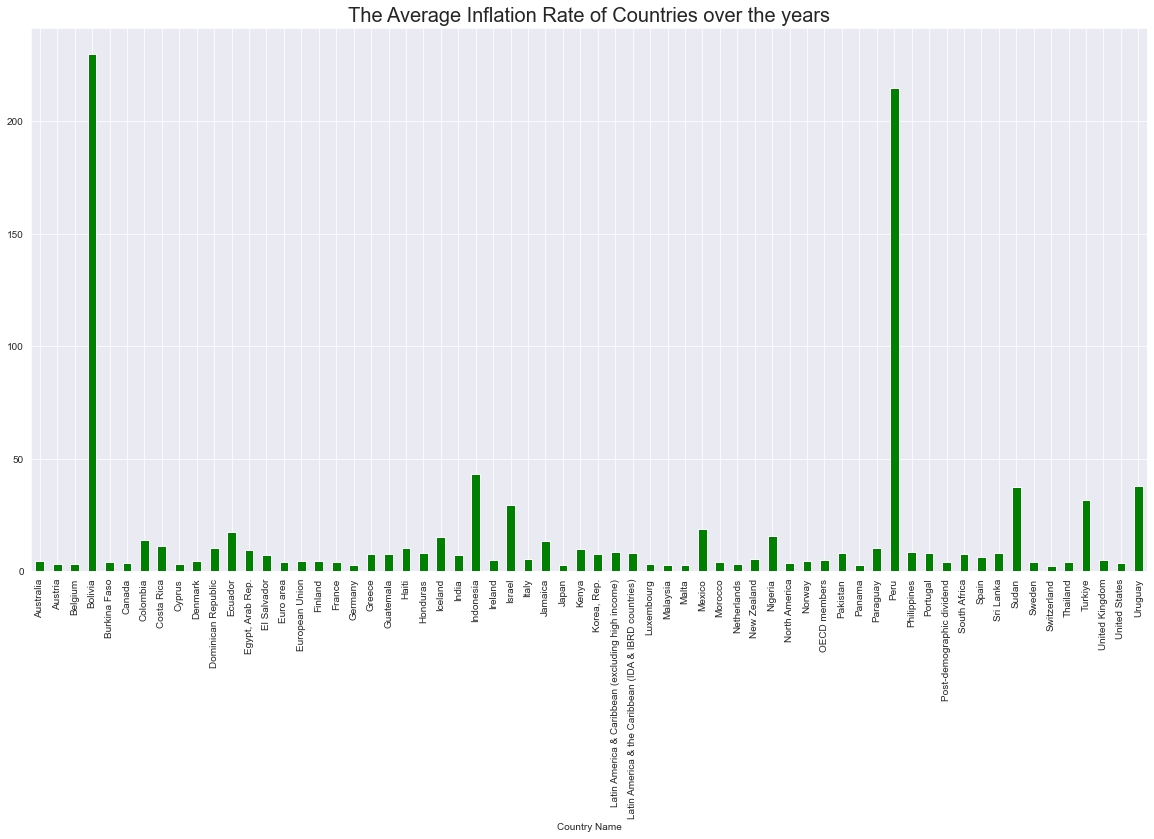

In [24]:
plt.figure(figsize = (20, 10))
da.groupby('Country Name')['Rate'].mean().plot(kind = 'bar', color='g')
plt.title("The Average Inflation Rate of Countries over the years", fontsize = 20)
plt.show()

### The highest Inflation value from each country

In [25]:
transp.max()

Country Name
Year                                                            2021
Australia                                                  15.416667
Austria                                                     9.521788
Belgium                                                    12.768199
Burkina Faso                                               29.986104
Bolivia                                                 11749.639632
Canada                                                     12.471612
Switzerland                                                 9.767414
Colombia                                                   34.090909
Costa Rica                                                 90.121333
Cyprus                                                     16.176667
Germany                                                     7.032026
Denmark                                                    15.275206
Dominican Republic                                          51.46086
Ecuador              

### Highest Inflation rate of alltime

In [26]:
da[da['Rate'] > 350]

,Country Name,Year,Rate
409,Indonesia,1966,1136.254112
1540,Bolivia,1984,1281.349942
1565,Israel,1984,373.215675
1604,Bolivia,1985,11749.639632
1842,Peru,1988,667.019329
1906,Peru,1989,3398.679010
1970,Peru,1990,7481.663611
2034,Peru,1991,409.530167
3959,Sudan,2021,382.815998


These values reveal the following as the top five highest ever inflation rates:
    1) Bolivia - 11749.63%
    2) Peru - 7481.66%
    3) Indonesia - 1136.25%
    4) Sudan - 382.81%
    5) Isreal - 373.21
These five countries have the highest maximum inflation in history.

These countries had the lowest Inflation rate compared to other countries, Although it the the highest ever in their own countries: 
    1. Germany - 7%
    2. Austria - 9.5%
    3. Switzerland - 9.8%
    4. Netherlands - 10.2%
    5. Luxembourg - 10.7%

### Lowest Inflation rate of all time

In [27]:
da[da['Rate'] < -5]

,Country Name,Year,Rate
24,Haiti,1960,-5.030042
567,Sudan,1968,-10.033895
1027,Burkina Faso,1976,-8.400719
1050,India,1976,-7.633948
1752,Haiti,1987,-11.449465


- These countries contained the lowest Inflation

### Inflation Analysis

We will now begin to analyze the evolution of the Inflation and some characteristics in some relevant years of different Countries.

Now we are going to compare side to side the countries with the most Inflation rates. Bolivia, Peru and Indonesia

In [28]:
def plot_country(da:pd.DataFrame, country:str):
    sns.set_style("white")
    data = da[da["Country Name"] == country]
    fig, ax = plt.subplots(1,1,figsize=(15,4))
    ax.plot(data.Year, data.Rate, color = "slategrey", marker="o", linewidth=2)
    ax.fill_between(data.Year, 0, data.Rate, alpha=0.2, color='g', where=(data.Rate >= 0))
    ax.fill_between(data.Year, 0, data.Rate, alpha=0.2, color='r', where=(data.Rate < 0))
    ax.set_xticks(data.Year)
    ax.set_xticklabels(data.Year, rotation=90)
    ax.set_title("Inflation evolution in "+country, loc="left", fontsize=20)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Inflation in %", fontsize=14)
    sns.despine()

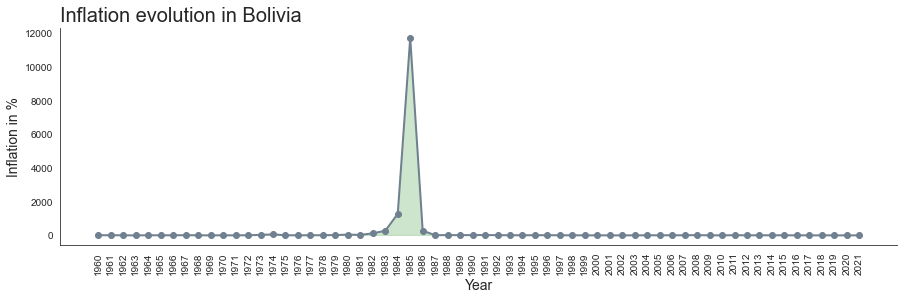

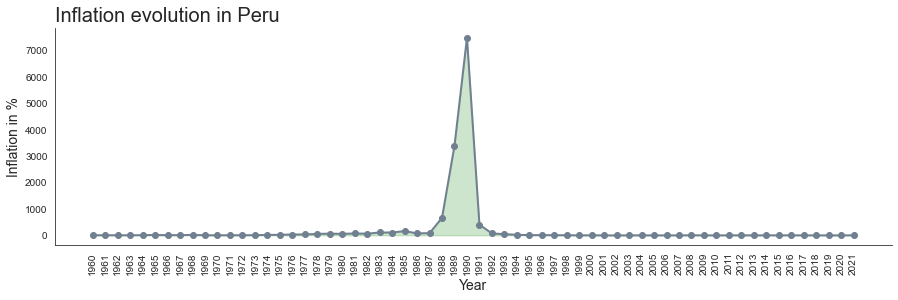

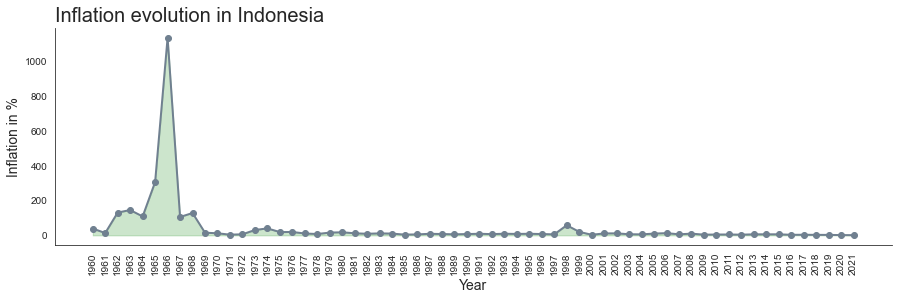

In [29]:
for country in ["Bolivia", "Peru", "Indonesia"]:
    plot_country(da, country)

- These 3 countries have a common point, they all have A year where they peaked in Inflation Rate then it drops dramatically over the next years. The 3 countries were all suffering from political instability.

Lets take a look into the Countries with the least Inflation.

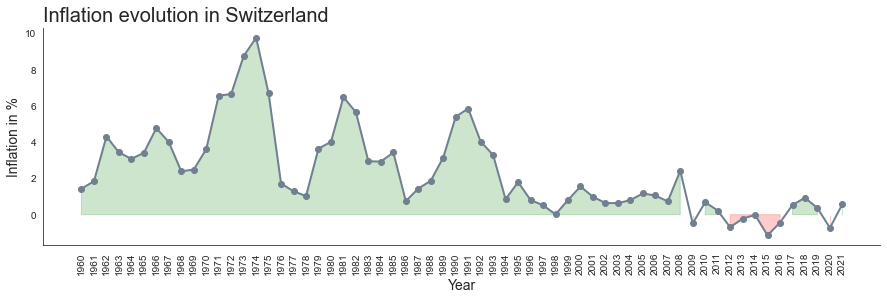

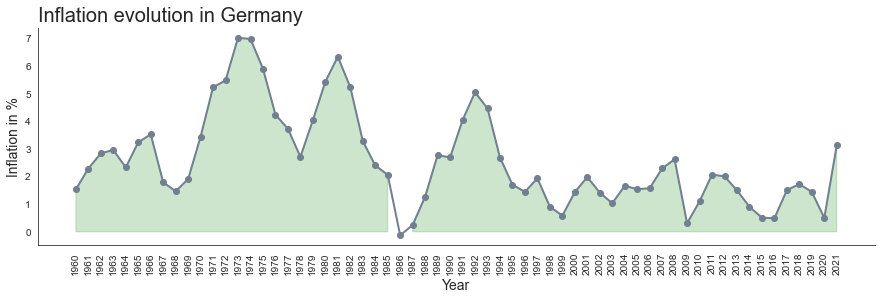

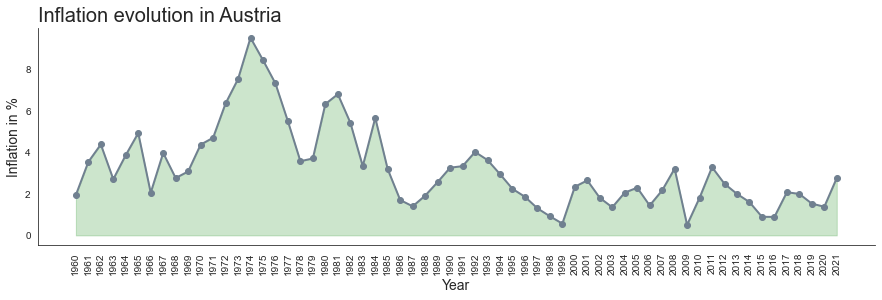

In [30]:
for country in ["Switzerland", "Germany", "Austria"]:
    plot_country(da, country)

- Unlike the countries that have hyperinflation over short periods of time, the Inflation Rate of Switzerland, Germany and Germany rose over a period of time and Lowers over the years.These countries never had an Inflation Rate higher then 10% since 1970.

### Heatmap

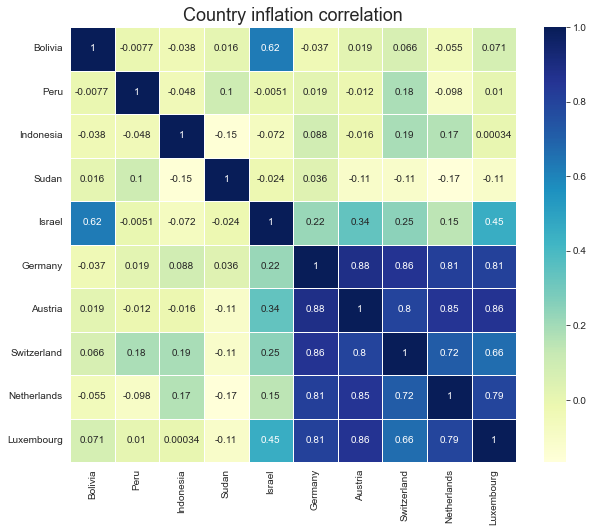

In [31]:
def countriesCorr(da, countries):
    table = da.pivot(index='Year', columns='Country Name', values='Rate')[countries]
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(table.corr(), cmap="YlGnBu", annot=True, linewidths=1, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title("Country inflation correlation", fontsize=18)
    plt.show()

countries = ["Bolivia", "Peru", "Indonesia","Sudan", "Israel", "Germany", "Austria", "Switzerland", "Netherlands", "Luxembourg"]
countriesCorr(da, countries)

### The overall Inflation rate of countries since 1960

<AxesSubplot:ylabel='Year'>

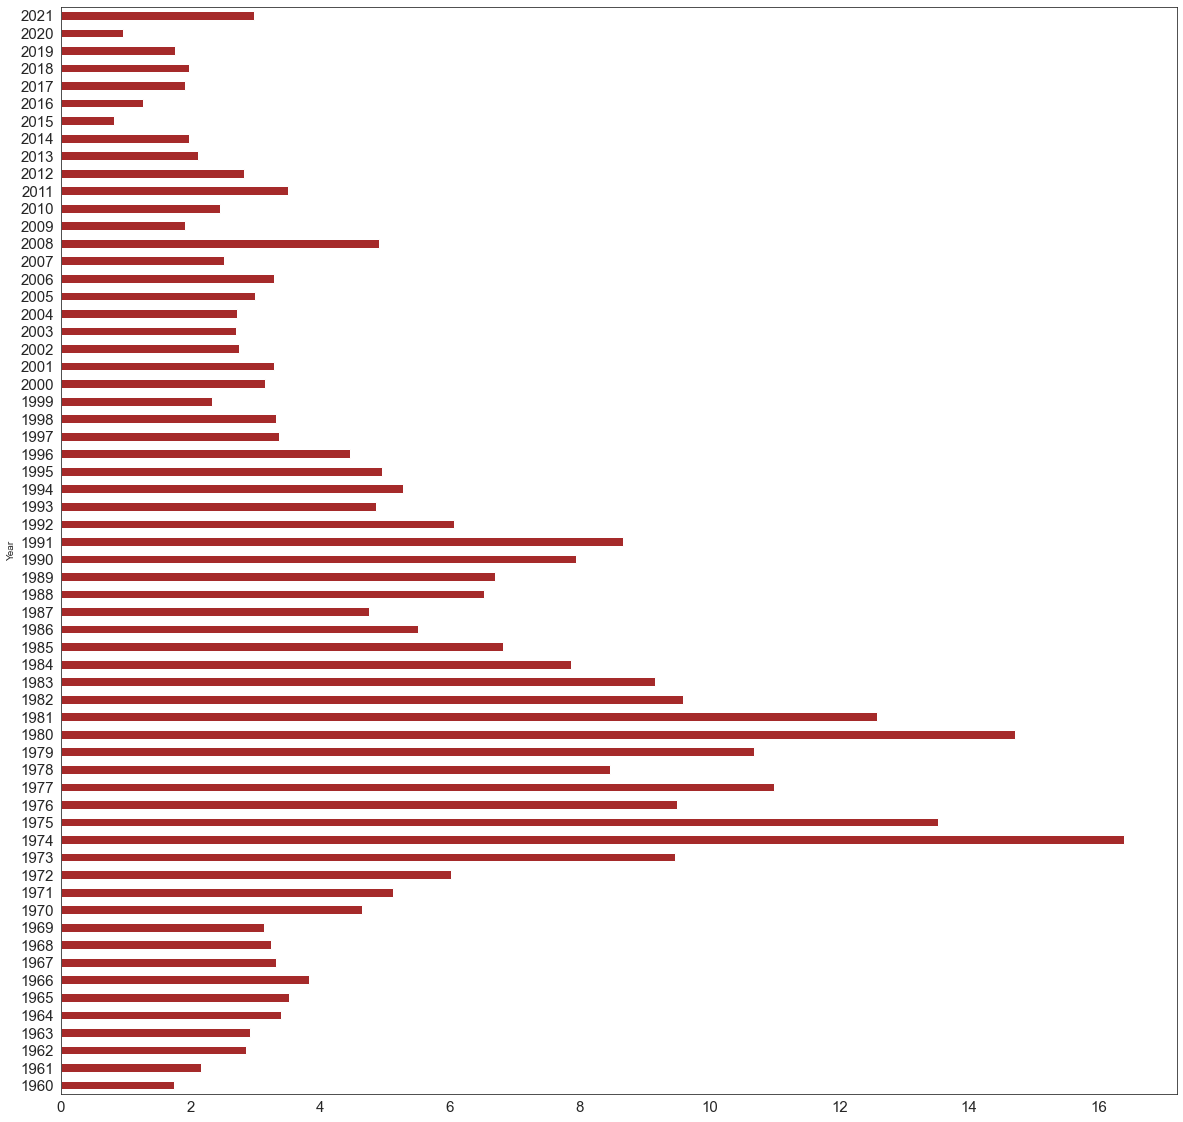

In [32]:
plt.figure(figsize = (20, 20))
da.groupby('Year').median()['Rate'].plot(kind ='barh', fontsize = 15, color='brown')

We can see from this graph that most countries have a high Inflation Rate from 1974, a total of 16 countries has seen a high Inflation rate that year, compared to recent years where contries have a fairly low Inflation rate.

### Calculating percentiles of countries that were colonized and non colonized

For non colonized country we are going to use Germany, while for colonized Country we are going to use India.

In [33]:
for i in range(90, 100): print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(transp['Germany'],i)))

The 90.0th percentile value is 5.24
The 91.0th percentile value is 5.34
The 92.0th percentile value is 5.45
The 93.0th percentile value is 5.47
The 94.0th percentile value is 5.63
The 95.0th percentile value is 5.89
The 96.0th percentile value is 6.15
The 97.0th percentile value is 6.45
The 98.0th percentile value is 6.85
The 99.0th percentile value is 7.00


In [34]:
for i in range(90, 100): print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(transp['India'],i)))

The 90.0th percentile value is 12.95
The 91.0th percentile value is 13.09
The 92.0th percentile value is 13.13
The 93.0th percentile value is 13.20
The 94.0th percentile value is 13.27
The 95.0th percentile value is 13.35
The 96.0th percentile value is 13.64
The 97.0th percentile value is 14.39
The 98.0th percentile value is 16.27
The 99.0th percentile value is 21.49


### Inflation rates affecting both colonized and non-colonized countries

For this we will split up the countries into seperate categories, Colonized and non-colonized countries. 

In [49]:
# non-colonized countries
non_country = transp[[ "Austria", "Belgium",  "Switzerland", "Cyprus", "Denmark", "Dominican Republic", "Finland", "France", "Germany","Italy", "United Kingdom", "Spain", "Greece","Ireland", "Iceland", "Japan", "Luxembourg", "Mexico", "Malta", "Netherlands", "Norway", "Portugal", "Sweden", "Thailand", "Turkiye"]]
non_country

Country Name,Austria,Belgium,Switzerland,Cyprus,Denmark,Dominican Republic,Finland,France,Germany,Italy,United Kingdom,Spain,Greece,Ireland,Iceland,Japan,Luxembourg,Mexico,Malta,Netherlands,Norway,Portugal,Sweden,Thailand,Turkiye
0,1.945749,0.299467,1.438795,0.827301,1.25523,-3.562192,3.418127,4.139936,1.536612,2.350161,1.003576,1.177771,1.477848,0.450837,1.988397,3.574512,0.44962,4.927519,3.384615,2.323944,0.360492,3.046593,4.141779,-0.765864,5.66474
1,3.54224,0.992676,1.845398,-0.615385,3.451629,-3.9,1.691002,2.400461,2.293676,2.050697,3.447496,0.809253,2.103579,2.756999,4.711615,5.368462,0.482434,1.60876,2.511322,1.307639,2.155173,1.548997,2.157973,7.38699,3.172857
2,4.381799,1.404607,4.315993,0.103199,7.37782,9.157128,4.383983,5.33128,2.84328,4.691144,4.196499,5.706477,-0.475428,4.263727,11.016292,6.83544,0.895947,1.198984,0.168675,2.431123,5.27426,2.662064,4.766197,3.696099,3.88832
3,2.708767,2.148003,3.440213,1.958763,6.105033,8.5796,4.996382,4.999153,2.966961,7.454718,2.018544,8.743698,3.184663,2.453621,12.928023,6.706906,2.876322,0.594055,1.876353,3.243647,2.471611,2.021583,2.87174,0.0,6.362707
4,3.868564,4.168761,3.080557,-0.303337,3.092784,2.107112,10.275861,3.211192,2.335728,5.912323,3.281587,6.979247,0.617303,6.71729,19.245054,3.800389,3.096382,2.337903,2.180244,5.823768,5.867015,3.444898,3.387662,-0.792079,1.119638
5,4.930916,4.065201,3.414479,0.20284,5.45,-1.89166,4.940588,2.703105,3.242329,4.519268,4.773775,13.214138,3.220872,4.988124,7.317069,6.655991,3.333679,3.568039,1.602218,3.908038,4.187224,3.424928,5.012771,0.166334,4.555534
6,2.054821,4.174348,4.77598,0.506073,7.06496,0.262927,3.873654,2.602001,3.533059,2.346589,3.909618,6.240367,4.903416,3.054299,10.686643,5.040832,3.33168,4.215788,0.523124,5.76214,3.250563,5.039267,6.404808,4.035204,8.471996
7,3.974673,2.730303,4.005196,0.704935,8.207854,1.238345,5.377782,2.791777,1.796046,3.733338,2.482116,6.391631,1.841357,3.183315,3.320219,3.989848,2.166157,3.016948,0.693868,3.455332,4.57927,5.526476,4.289319,4.309657,13.974893
8,2.764864,2.70145,2.395822,3.766667,8.005207,0.035976,9.191668,4.543205,1.470304,1.277313,4.697428,4.954366,0.139061,4.680851,15.231798,5.339433,2.625429,2.333951,2.037301,3.720793,3.448293,6.081362,1.943126,1.79036,6.04624
9,3.080404,3.753992,2.489036,2.385159,3.487919,0.956628,2.205611,6.045963,1.912664,2.657253,5.446664,2.160347,2.638919,7.418699,21.763295,5.249821,2.294434,3.367003,2.334288,7.42179,2.96295,8.782771,2.691995,2.450391,4.924194


- The countries that were not colonized are Austria, Belgium,  Switzerland, Cyprus, Denmark, Dominican Republic, Finland, Germany, France, Italy, United Kingdom, Spain, Greece, Ireland, Iceland, Japan, Luxembourg, Mexico, Malta, Netherlands, Norway, Portugal, Sweden, Thailand, Turkiye.

In [48]:
#colonized country
colo_country = transp[["Australia","Burkina Faso", "Bolivia", "Canada","Colombia", "Costa Rica", "Ecuador", "Egypt, Arab Rep.", "Dominican Republic", "Honduras", "Haiti", "Indonesia", "India", "Israel","Italy", "Jamaica", "Kenya", "Korea, Rep.", "Latin America & Caribbean (excluding high income)", "Sri Lanka", "Morocco", "Malaysia", "North America", "Nigeria", "New Zealand", "Pakistan", "Panama", "Peru", "Philippines", "Paraguay", "Sudan", "El Salvador", "Uruguay", "South Africa", "United States"  ]]
colo_country

Country Name,Australia,Burkina Faso,Bolivia,Canada,Colombia,Costa Rica,Ecuador,"Egypt, Arab Rep.",Dominican Republic,Honduras,Haiti,Indonesia,India,Israel,Italy,Jamaica,Kenya,"Korea, Rep.",Latin America & Caribbean (excluding high income),Sri Lanka,Morocco,Malaysia,North America,Nigeria,New Zealand,Pakistan,Panama,Peru,Philippines,Paraguay,Sudan,El Salvador,Uruguay,South Africa,United States
0,3.728814,7.788162,11.533153,1.358696,5.814076,0.790206,1.676599,0.332829,-3.562192,-1.746238,-5.030042,39.590444,1.779878,2.228112,2.350161,3.274249,1.243781,7.965566,2.266871,-1.544677,3.424299,0.063183,1.408336,5.444327,0.697929,6.947368,0.051177,8.664459,4.154822,8.181818,0.09224,-0.038974,38.504037,1.288859,1.457976
1,2.287582,18.562139,7.561493,1.018767,8.28319,2.430794,3.985621,0.693607,-3.9,1.562992,3.779706,13.691932,1.695213,6.789823,2.050697,6.698451,2.457002,8.195653,3.10525,1.134444,1.763125,-0.180408,1.044745,6.279147,1.797704,1.64042,0.613811,5.916709,1.595633,18.487395,8.760511,-2.68247,22.747264,2.102374,1.070724
2,-0.319489,1.67591,5.879331,1.061571,4.697094,2.67786,2.870885,-3.003077,9.157128,1.09215,-0.554904,131.397849,3.632215,9.408194,4.691144,1.407507,3.117506,6.618311,2.076695,1.50358,5.096729,0.10844,1.130172,5.265632,2.680854,-0.516462,0.788002,6.641093,5.796652,1.41844,1.662871,0.096154,10.907424,1.246285,1.198773
3,0.641026,5.574203,-0.706357,1.628151,26.355436,2.931618,5.939509,0.746646,8.5796,3.081456,4.306822,145.910781,2.946161,6.581137,7.454718,1.762503,0.697674,20.691647,2.51476,2.272905,5.699712,3.105254,1.43391,-2.694655,1.968499,1.456488,0.449888,6.070144,5.625549,2.097902,4.688233,1.569004,21.254696,1.33797,1.239669
4,2.866242,1.845123,10.181818,1.912145,17.072435,3.324033,4.034205,3.660983,2.107112,4.472101,9.162146,108.994709,13.355261,5.17275,5.912323,2.013423,-0.099305,29.462831,3.679119,3.195647,4.021541,-0.402732,1.595528,0.856793,3.474905,4.179587,2.413536,9.792285,8.183079,1.369863,3.950838,1.757566,42.369416,2.534973,1.278912
5,3.405573,-0.730253,2.860286,2.332657,7.590684,-0.665,3.069071,14.839004,-1.89166,3.186275,2.263943,306.76311,9.474759,7.708333,4.519268,2.631579,3.578529,13.548195,2.745932,0.222783,3.482821,-0.105485,1.958913,4.103459,3.39749,5.568635,0.461613,16.389961,2.564103,3.859298,-2.446029,0.456975,56.556557,4.069029,1.585169
6,3.293413,2.364106,6.951872,3.815659,16.728168,0.182883,5.453727,9.036441,0.262927,1.784235,8.301836,1136.254112,10.801848,7.930368,2.346589,1.902399,5.014395,11.261385,2.873194,-0.155602,-1.013579,0.967969,3.415367,9.690346,2.755481,7.227622,0.19347,8.840604,5.4,2.873194,1.712463,-1.187355,73.462693,3.489234,3.015075
7,3.478261,-4.333754,11.2,3.579952,8.328191,1.20834,3.818138,0.701897,1.238345,2.091841,-2.935311,106.0,13.062202,1.706093,3.733338,3.023539,1.759196,10.88244,2.554395,2.189239,-0.748277,4.575562,3.176369,-3.726337,6.05692,6.8114,1.375815,9.783603,6.253953,1.365268,11.013556,1.466916,89.275297,3.538992,2.772786
8,2.521008,-0.286714,5.470624,4.0553,7.447539,4.093891,4.317656,-1.675759,0.035976,1.861224,1.316212,128.843042,3.237412,2.079222,1.277313,5.928698,0.366712,10.771821,3.253567,5.860566,0.436479,-0.158347,4.163548,-0.476059,4.311925,0.170627,1.619048,19.086619,2.358806,0.708074,-10.033895,2.537681,125.336991,1.986136,4.271796
9,3.278689,9.655529,2.209748,4.561559,6.981663,2.629341,6.326681,3.40982,0.956628,1.258214,1.413181,15.47987,-0.584137,2.458054,2.657253,6.303459,-0.171501,12.389565,2.441861,7.456953,2.949891,-0.409015,5.011973,10.155979,4.925242,3.186987,1.827554,6.236158,1.95551,2.246848,12.606869,-0.19499,20.966667,3.238225,5.462386


- The countries that were colonized before were Australia,Burkina Faso, Bolivia, Canada, Colombia, Costa Rica, Ecuador, Egypt, Arab Rep., Dominican Republic, Honduras, Haiti, Indonesia, India, Israel, Jamaica, Kenya, Korea, Rep., Latin America & Caribbean, Sri Lanka, Morocco, Malaysia, North America, Nigeria, New Zealand, Pakistan, Panama, Peru, Philippines, Paraguay, Sudan, El Salvador, Uruguay, South Africa, United States.

In [38]:
def compare_countries(transp:pd.DataFrame, countries:list):
    if len(countries) > 2:
        raise ValueError('More than two countries passed')
    sns.set_style("white")
    data = transp[transp["Country Name"].isin(countries)]
    fig, ax = plt.subplots(1,1,figsize=(25,4))
    sns.lineplot(x='Year', y='Rate', hue='Country Name', data=data, ax=ax, marker="o", linewidth=2, markersize=8)
    ax.set_xticks(transp.Year)
    ax.set_xticklabels(transp.Year, rotation=90)
    ax.set_title(f"Inflation comparison between {countries[0]} and {countries[1]}", loc="left", fontsize=20)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Inflation in %", fontsize=14)
    sns.despine()

We will now start to compare some of the Inflation Rates of colonized countries and non-colonized countries to see their effects and can colonized countries recover from the Inflation rate when they declared Independence as well as can colonized countries do better then non-colonized countries in terms of growth.

### Comparing colonized and non colonized countries

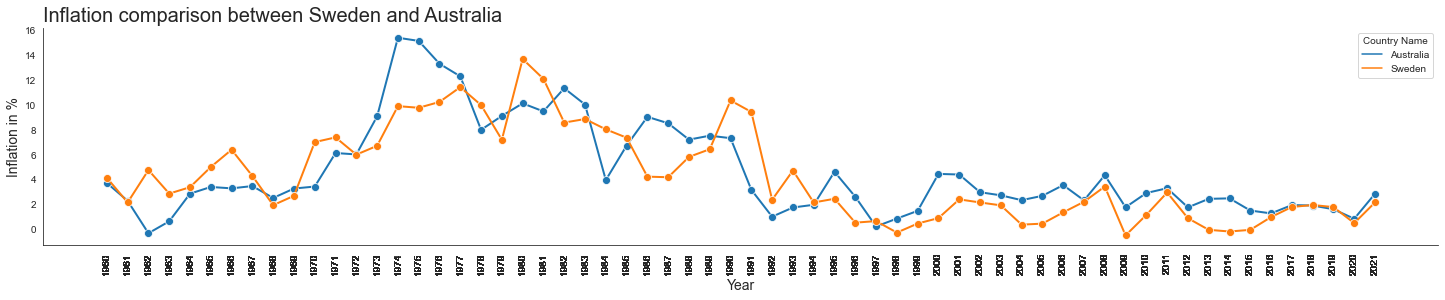

In [40]:
compare_countries(da, ['Sweden', 'Australia'])

Sweden was a country that was never colonized while Australia was colonized by British and later gain Independence. This graph shows that both countries had a similar Inflation Rate throughout the years.

### Colonized countries with different Inflation Rate over the years.

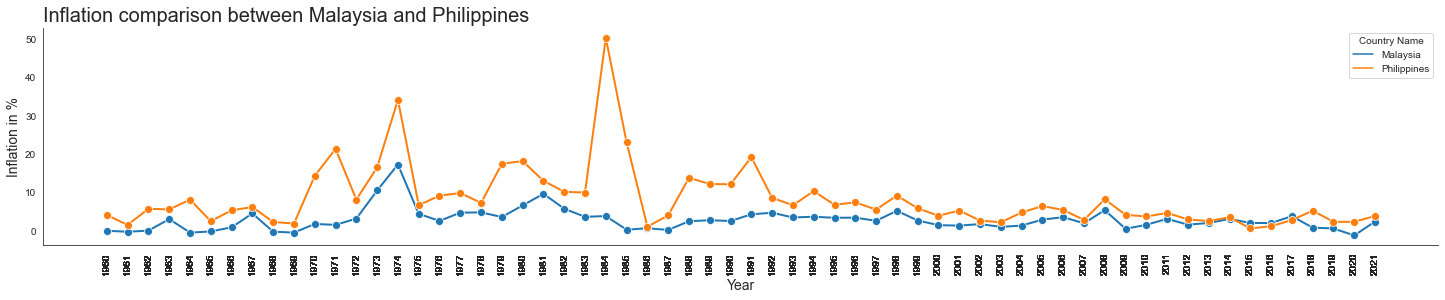

In [50]:
compare_countries(da, ['Malaysia', 'Philippines'])

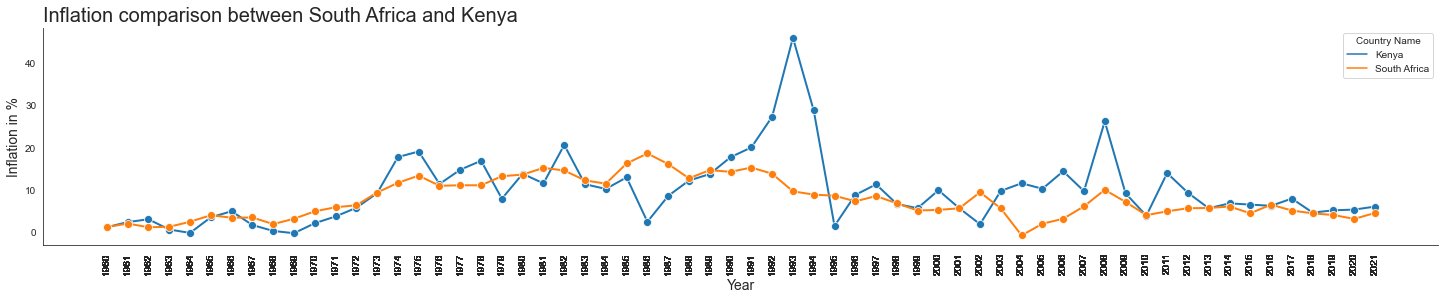

In [43]:
compare_countries(da, ['South Africa', 'Kenya'])

Countries that were colonized have different Inflation rate progressions, even though they were colonized, some countries deal with their Inflation rate better then others. Malaysia and Philippines are both countries in Asia and were colonized, Malaysia has a lower inflation Rate compared to the Philipines even though they gain their independence earlier then Malaysia. South Africa and Kenya were colonized by the same United Kingdom but South Africa had a more stable Inflation then Kenya.

### The influence of colonized countries  on countries they colonize

In [62]:
def compare_mcountries(transp:pd.DataFrame, countries:list):
    if len(countries) > 3:
        raise ValueError('More than three countries passed')
    sns.set_style("white")
    data = transp[transp["Country Name"].isin(countries)]
    fig, ax = plt.subplots(1,1,figsize=(25,4))
    sns.lineplot(x='Year', y='Rate', hue='Country Name', data=data, ax=ax, marker="o", linewidth=2, markersize=8)
    ax.set_xticks(transp.Year)
    ax.set_xticklabels(transp.Year, rotation=90)
    ax.set_title(f"Inflation comparison between {countries[0]} and {countries[1]} and {countries[2]}", loc="left", fontsize=20)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Inflation in %", fontsize=14)
    sns.despine()

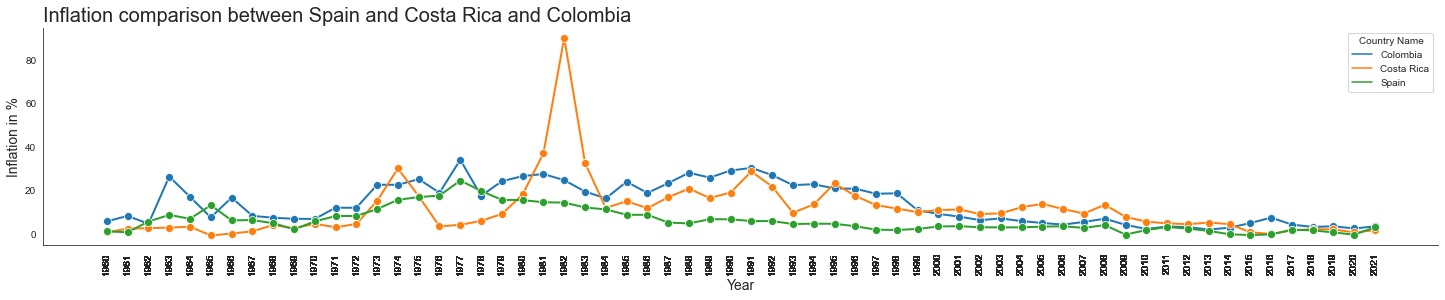

In [63]:
compare_mcountries(da, ['Spain', 'Costa Rica', "Colombia"])

- The graph shows the relation between the colonizing countries which are Costa Rica and Colombia, and the country that colonized them which was Spain. Spain has a lower Inflation rate compared to the countries that it has colonized.

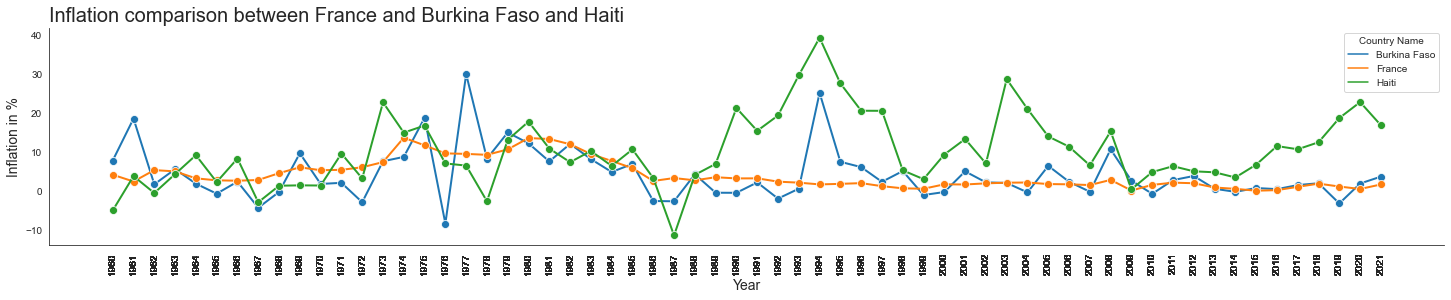

In [66]:
compare_mcountries(da, ['France', 'Burkina Faso', "Haiti"])

- Another example is France which is the colonizing country, and the ones that were colonized are Burkina Faso and Haiti. France has a stable economy Inflation over the years without any massive changes. While Haiti and Burkina Faso has seen some dramatical changes over the years.

### Colonized countries that have better Inflation Rate then non colonized countries

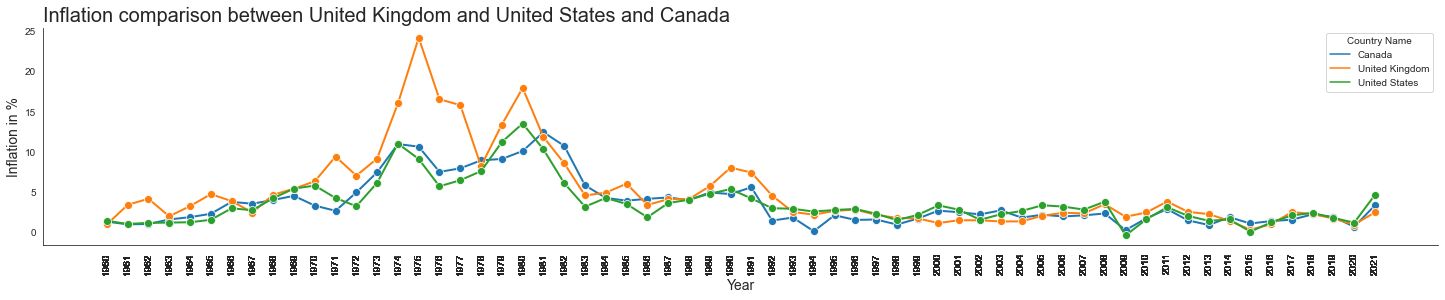

In [64]:
compare_mcountries(da, ['United Kingdom', 'United States', "Canada"])

The United states and Canada gained their independence before 1960, this graph shows that the United kingdom which were the ones who colonized the United States and Canada, have a lower Inflation Rate throughout the years. The graph shows a Increasing Inflation Rate in the 1974 due to the world being unprepared for higher oil prices, cars were not fuel efficient and there were fewer alternatives to oil. Canada and United States handled their Inflation better then the country which colonized them.

- This proves that not all colonized countries are the same with dealing with Inflation, being colonized does not mean the country will have a high Inflation Rate.

Hypothesis : Countries colonized have a higher inflation rate than countries without historical colonization. Research Question : Does the history of colonization influence the inflation rate of colonized countries?

Conclusion: Colonized Countries have on average higher Inflation Rates compared to their non-colonized counterparts. Colonizing countries does have some impact on their Inflation Rate but it does not remain the same for others. Some countries can have a lower Inflation Rate then the ones that colonized them. Variously factors contribute to Inflation, although colonizing has some Impact, it is not the deciding factor of Inflation. 